# Math Concepts for Developers
## Final Project 

## Project name: Fourier Transform Applications: Images
## Project author: Anh Dinh

### Terms and conditions:
* Use Jupyter notebook for text and maths. You can use any programming language you would like.
* Write your research and code in English. Bulgarian is also acceptable but try to use English.
* If you have sensitive, copyrighted, or copy-protected assets, including but not limited to, images, multimedia, code, documents, and datasets,
  you can sign an NDA (non-disclosure agreement) with the SoftUni team. Contact the lecturer if you need assistance with the process.
* Any code which does not comply with the Bulgarian law (as of the exam date), will be given zero points.
* Any malicious code, or code intended to do harm to the user's computer, information, or privacy, will be given zero points.

By submitting your project for the exam, you agree with these terms and conditions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import truncnorm
import skimage.io


*Disclaimer: This paper or article if you can call it is an final exam for a course I'm undertaking. Rather than making it extremely scientific and formulaic, I would like it to have a light tone and be more like a journal of how I understand the matter and how I would like it to be presented to a me who has no knowledge of.*


Firstly, let's get it straight out and say that the meat of the matter is image processing. Image processing is important in the digital world we are living in as a way to work up the raw images we take with our smartphones or cameras. Imagine you shoot with the most expensive camera you do need to touch it up to come up with the piece of art you need to justify the purchase in the first place, but also to clean up or adjust the the overal look of the image which you did not take into acount when you captured that one in a life time moment.

Today we are going to take a look at some of the image processing techniques and how they derive from a common transformation. Before diving in to images we take a step back and understand what is Fourier Transform.

### Fourier Transform

The essence of Fourier Transform (FT) is decomposing a function of time into constituent frequencies. What that means is that it can single out frequences with known characteristics.

Now to solve this issue smart people in the past had the intuition that periodic functions (waves) can be represented as sum of sins and cosines with certain magnitudes, so a linear combination. This is also how the Fourier series for this function is defined:

$$f(t) = \frac{1}{2}a_0 + \sum_{k=1}^{\infty}{a_k cos 2\pi k t + b_k sin 2\pi k t}$$

If we take a look at this white noise:

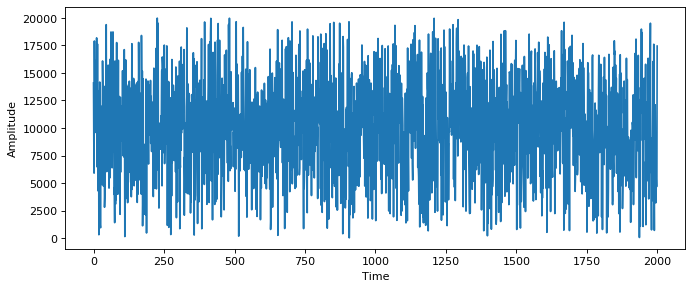

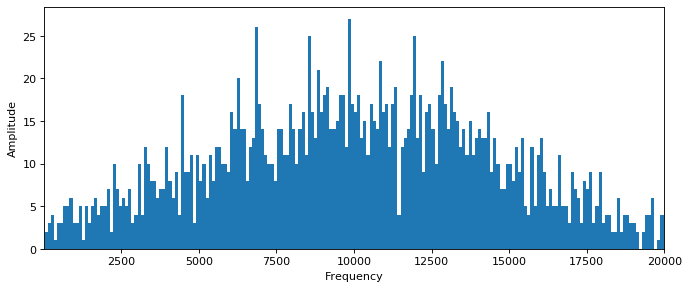

In [2]:
mean = 10000
std = 5000

low_freq = 20
high_freq = 20000
t_samples = 2000

def get_truncated_normal(mean = 0, std = 1, low = 0, high = 10):
    return truncnorm((low - mean) / std, (high - mean) / std, loc = mean, scale = std)

normal_distribution = get_truncated_normal(mean = mean, std = std, low = low_freq, high = high_freq)
samples = normal_distribution.rvs(t_samples)

plt.figure(figsize=(10, 4), dpi=80)
plt.plot(samples)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4), dpi=80)
plt.hist(samples, bins = 200)
plt.xlim(low_freq, high_freq)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

There are two representation of this sound one as a the amplitude over time and the other magnitude over frequency domain, that is the intensity of each value over the frequency domain. The second one is called a spectrum plot.

We are yet to find the coefficiancies of the frequencies. Since sins and cosine are in a way incovenient to work with, the Euler's formula is used: $e^{i 2\pi \theta} = cos\,2\pi\theta + i\,sin\,2\pi\theta$, therefore chaging the basis to elements of set $\{e^{i 2\pi \theta}\}_{\theta \in \mathbb{R}}$, which are also representation of basic sinosoids.

As a transform it is a mapping between data from the time domain (original function) and the frequency domain.

The transform changing from time to frequecy domain, also known as **Forward Fourier Tranform** is defined by the equation:

$$
\hat f(\nu) = \int_{-\infty}^{+\infty}f(t)e^{-i 2\pi \nu t}\,dt
$$

Since it can be a two way process we come across the second equation for **Inverse Fourier Tranform**:

$$
f(t) = \int_{-\infty}^{+\infty}\hat{f}(\nu)e^{i 2\pi \nu t}\,d\nu
$$

The continous integration is not fun to work with especially in computing and the fact that in computing we work on a finite interval, we can consider using partitioning the interval to discrete steps:

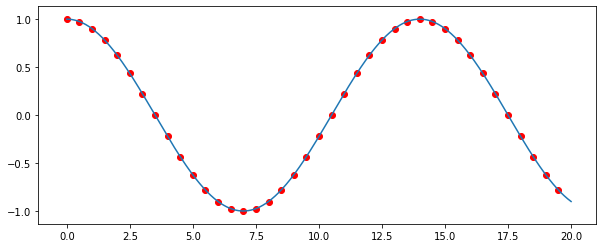

In [3]:
def plot_math_function(f, min_x = -2, max_x = 2, num_points = 1000, figure_size = None, discrete_point_distance = 0):
    x = np.linspace(min_x, max_x, num_points)
    y = f(x)

    if figure_size != None:
        plt.figure(figsize=(10, 4))

    plt.plot(x, y)

    if discrete_point_distance > 0:
        x_markers = np.arange(min_x, max_x, discrete_point_distance)
        plt.scatter(x_markers, f(x_markers), c="red")

    plt.show()

plot_math_function(lambda t: np.cos(np.pi * t * 1 / 7), min_x = 0, max_x = 20, figure_size = (0, 20), discrete_point_distance = 0.5)

In [4]:
# signal_generator = lambda f: lambda t: np.cos(2 * np.pi * f * t) * np.e ** (-np.pi * (t ** 2))
# signal = lambda x: signal_generator(3)(x) + signal_generator(5)(x)
# plot_math_function(signal, -2, 2, 1000)

The transform becomes a Discrete Fourier Transform (DFT):

$$
X_k = \sum_{n=0}^{N - 1}{x_n\,e^{-\frac{i2\pi k n}{N}}}
$$

where $X_k$ is the cofficient of *k-th* frequency, $N$ is the number of discrete values (frequency samples).
To make a corelation with the continuous FT: $\frac{k}{N} \widehat{=} F$ and $n \widehat{=} t$.

Consider $b_n = \frac{i2\pi k n}{N}$ for each of the teram in DFT sum. In becomes:

$$
X_k = x_0e^{-b_0j} + x_1e^{-b_1j}+...+ x_{N-1}e^{-b_{N-1}j}
$$

$$
X_k = x_0[cos(-b_0) + i\,sin(-b_0)]+x_1[cos(-b_1) + i\,sin(-b_1)]+...
$$

Now the last expression ends up a complex number $X_k = A_k + B_k\,i$.

As any other complex number in can be visualized on a *(Real, Imag)* plot:

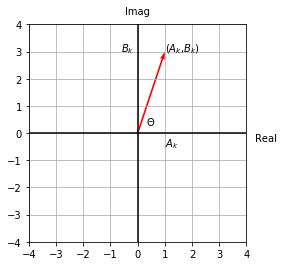

In [5]:
def plot_complex_number(number, colors):
    """
    Plots the given complex numbers as radius vectors in the 2D space
    """
    
    _, ax = plt.subplots()
    plt.quiver(0, 0, number.real, number.imag, color = colors, angles = "xy", scale_units = "xy", scale = 1)

    plt.gca().set_aspect("equal")
    plt.grid(True, which='both')
    plt.xticks(np.arange(-4, 5))
    plt.yticks(np.arange(-4, 5))

    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.yaxis.set_label_position("right")
    ax.set_ylabel("Real", rotation = 0, labelpad=20)
    ax.xaxis.set_label_position("top")
    ax.set_xlabel("Imag", labelpad=10)

    plt.text(number.real, -0.5, "$A_k$")
    plt.text(-0.6, number.imag, "$B_k$")
    plt.text(number.real, number.imag, "($A_k$,$B_k$)")
    plt.text(0.3, 0.3, "$\Theta$")
    
    plt.show()

plot_complex_number(1 + 3j, 'red')

The vector's magnitude $\sqrt{A_k^{2}+B_k^{2}}$ (normalized by dividing to the number of samples) corresponds to the amplitude of the sinosoid and the angle between this vector and the real axis ${\Theta} = \arctan\frac{B_k}{A_k}$ is the phase.

### Fourier Transform in 2D

So how does this translate to an image? An image is a 2 dimensional matrix of data (pixels), so instead of a function of time (one argument) we choose an original function of two arguments. Another thing we need to take into account that the pixel position axes are integer values as opposed to time which is a float value. We will come back to that, but first let's consider a 2-argument continuous function.

The Fourier Transform pair definitions becomes:

$$
F(u,v) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}f(x,y)e^{-i 2\pi (ux+vy)}\,dx\,dy
$$

$$
f(x,y) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}F(u,v)e^{i 2\pi (ux+vy)}\,du\,dv
$$

where $(x,y)$ is the position of a pixel and $(u,v)$ are spacial frequencies.

Similar to the 1-dimensinal version we are decomposing into functions $e^{i 2\pi (ux+vy)} = cos\,2\pi(ux+vy) + i\,sin\,2\pi(ux+vy)$, the terms of which are sinosoids on the $(x,y)$ plane.

We can represent them visually using vectors. Consider vectors $\textbf{u} = (u,v)^T$ and $\textbf{x}=(x,y)^T$. We can then find the extremum of $cos\,2\pi(ux+vy)$ at:

$$
2\pi(ux+vy) = n\pi, n \in \mathbb{N} \textrm{ or}
$$

$$
2\pi\textbf{u}.\textbf{x} = n\pi
$$

$$
\textbf{u}.\textbf{x} = \frac{1}{2}n
$$

Pinning vector $(u,v)^T$, this is a set of equally distanced parallel lines with normal $(u,v)^T$ and wavelength $\frac{1}{\sqrt{u^2+v^2}}$.

As said previously images are pixels which means the input data for the source function are integers therefore limited. In this case the frequncy domain is not an interval but rather set of frequencies with size the number of pixels. Consider an image sized MxN pixels, the Discrete Fourier Transform becomes:

$$
\hat{f}(u,v) = \sum_{m=0}^{M-1}\sum_{n=0}^{N-1}f(m,n)e^{-i2\pi(\frac{u}{M}m + \frac{v}{N}n)}
$$

Similarly we have the Inverse Discrete Fourier Transform, which reverses the data from frequency to the spatial domain:

$$
f(m,n)= \frac{1}{MN}\sum_{u=0}^{M-1}\sum_{v=0}^{N-1}\hat{f}(u,v)e^{i2\pi(\frac{um}{M} + \frac{vn}{N})}
$$

The term $\frac{1}{MN}$ is for normalization purposes.

The output of DFT once again consists of complex valued numbers, this time as a matrix. We can combine only real parts or only imaginary part of the values into 2 images (magnitude and phase), but once again only consider analyzing/manipulating the magnitude image.

For reconstructing the image back into spatial domain we require both images.

### 2D Discrete Fourier Transform Algorithm 


Let us work the DFT out a little bit:

$$
\hat{f}(u,v) = \sum_{m=0}^{M-1}\sum_{n=0}^{N-1}f(m,n)\,e^{-i2\pi(\frac{u}{M}m + \frac{v}{N}n)}
$$

$$
\hat{f}(u,v) = \sum_{m=0}^{M-1}\sum_{n=0}^{N-1}f(m,n)\,e^{-i2\pi\frac{u}{M}m}\,e^{-i2\pi\frac{v}{N}n}
$$

$$
\hat{f}(u,v) = \sum_{m=0}^{M-1}(\sum_{n=0}^{N-1}f(m,n)\,e^{-i2\pi\frac{v}{N}n})\,e^{-i2\pi\frac{u}{M}m}
$$

The expression between the middle brackets is the *1D DFT* for fixed $m$ (row) in regards to $n$ (column).
By substituting $\sum_{n=0}^{N-1}f(m,n)\,e^{-i2\pi\frac{v}{N}n} = V_n(m)$:

$$
\hat{f}(u,v) = \sum_{m=0}^{M-1}V_n(m)\,e^{-i2\pi\frac{u}{M}m}
$$

we see yet another *1D DFT* equation in regards to $m$ (row). Effectively applying 2D DFT is the same as applying 1D DFT twice, first on the columns, then on the rows (or vice versa). This characteristics is called separability and is something we will use in our algorithm.

One thing to note is that the first DFT operation $\mathbb{R}\rightarrow\mathbb{C}$ and the second one is $\mathbb{C}\rightarrow\mathbb{C}$.

In [6]:
image = skimage.io.imread("data/stairs.jpg", as_gray=True)
assert image.shape == (400, 613), "image shape is not correct (400, 613)"

plt.rcParams.update({'font.size': 22})

In [7]:
def dft2(source_image, dft = np.fft.fft):
    """
    2D Discrete Fourier Transform.
    dft parameter is an implementation of a one dimensional DFT.
    For the purpose of this article we default to the fast discrete fourier transform in numpy,
    as the direct implementation of the DFT is very slow even for our example.
    """
    ft_image = np.zeros(source_image.shape, dtype = complex)

    for col in range(ft_image.shape[1]):
        ft_image[:, col] = dft(source_image[:, col])

    for row in range(ft_image.shape[0]):
        ft_image[row, :] = dft(ft_image[row, :])

    return ft_image

assert np.allclose(dft2(image), np.fft.fft2(image)), 'Incorrect DFT implementation'

def show_image(image):
    plt.imshow(np.abs(image), "gray")

def show_spectrum(ft_image):
    plt.imshow(np.log(1 + np.abs(ft_image)), "gray")

def show_phase(ft_image):
    plt.imshow(np.angle(ft_image), "gray")

As denoted in the code, the direct implementation of DFT is very slow. There a various Fast Fourier Transform algorithms, for example the [Cooley–Tukey FFT algorithm](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm), which we can challenge in the near future.

There are many publications dedicated to computing 2D DFT, one of which is the [2D Discrete Fourier Transform on Sliding Windows](https://www.researchgate.net/publication/270966399_2D_Discrete_Fourier_Transform_on_Sliding_Windows).

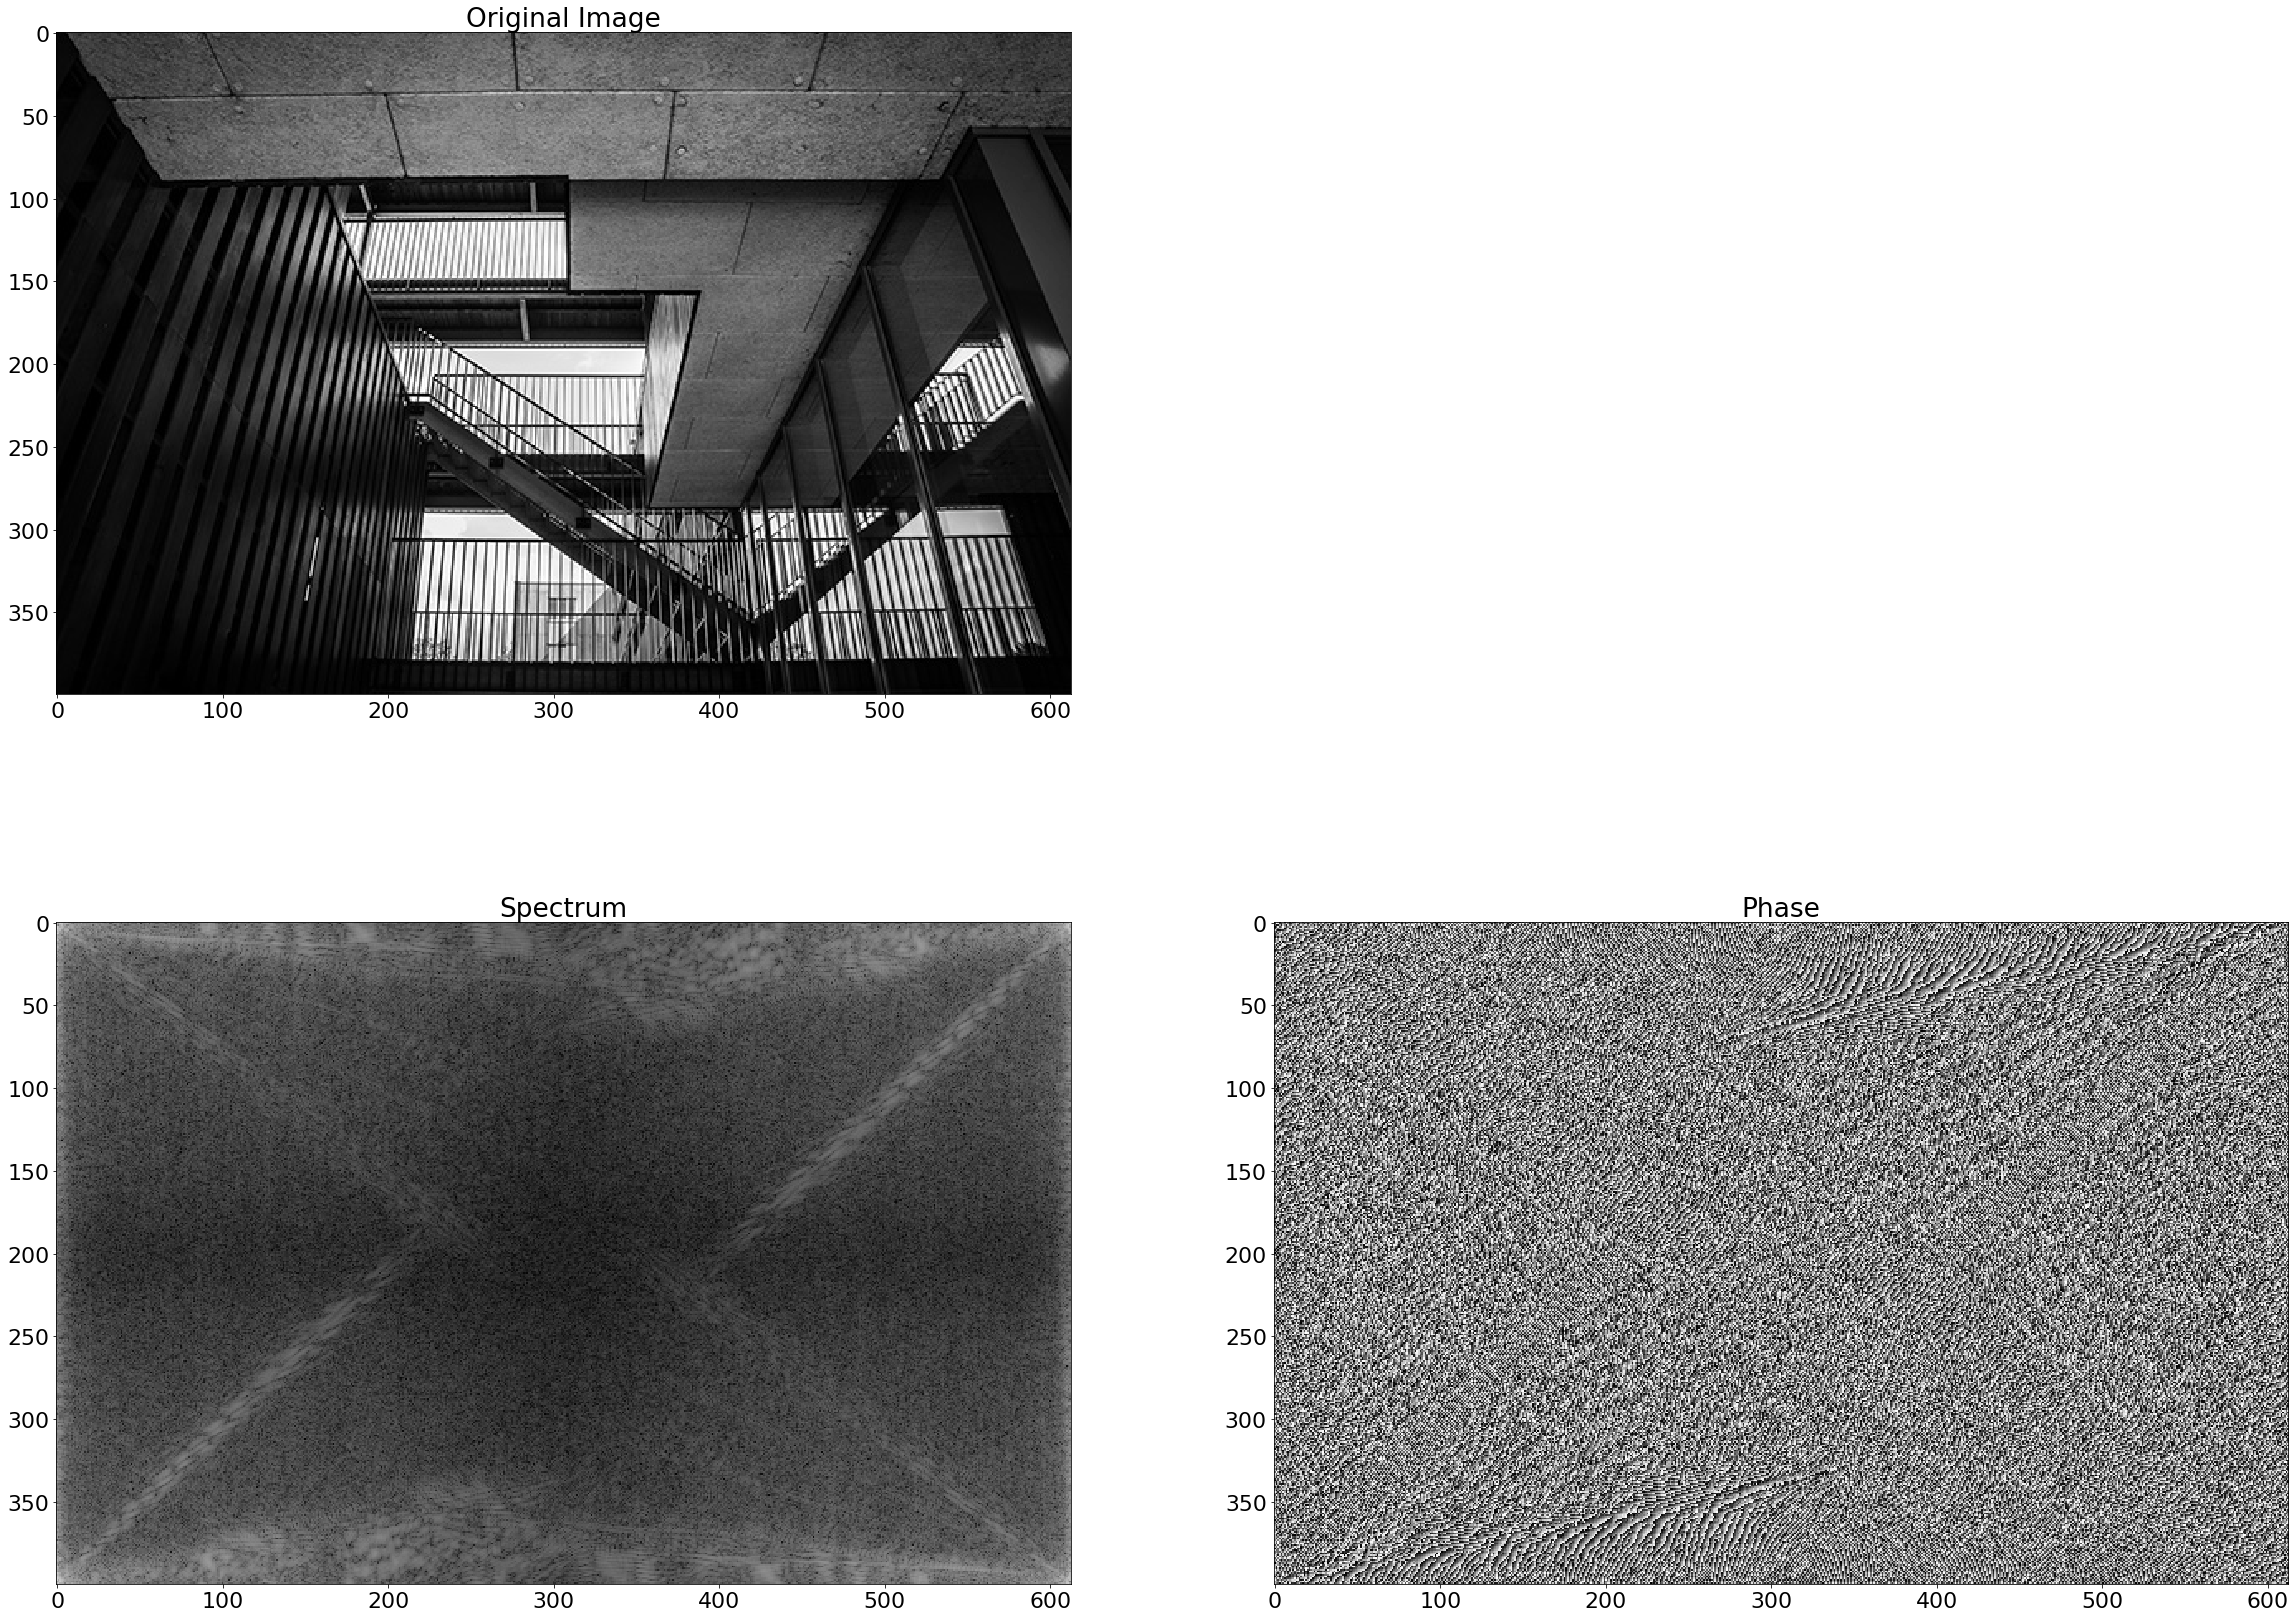

In [8]:
plt.figure(figsize=(40, 30))

plt.subplot(221)
plt.imshow(image, "gray")
plt.title("Original Image")

ft_original = dft2(image)

plt.subplot(223)
show_spectrum(ft_original)
plt.title("Spectrum")

plt.subplot(224)
show_phase(ft_original)
plt.title("Phase")

plt.show()

#### Analysis:
***Spectrum image***: The light area indicate higher magnitude of frequency. The corners represent lowest frequences. So in out image we have high presence of the lowest frequencies.

***Phase image***: Looks to be an uniform noise overall except some part on the top right and bottom left side, like sand drags.

Usualy the spectrum image is shifted so that lower frequencies reside in teh center and the highest ones are further from the center - to look more intuitive.

In [9]:
def center_frequencies(ft_image):
    return np.fft.fftshift(ft_image)

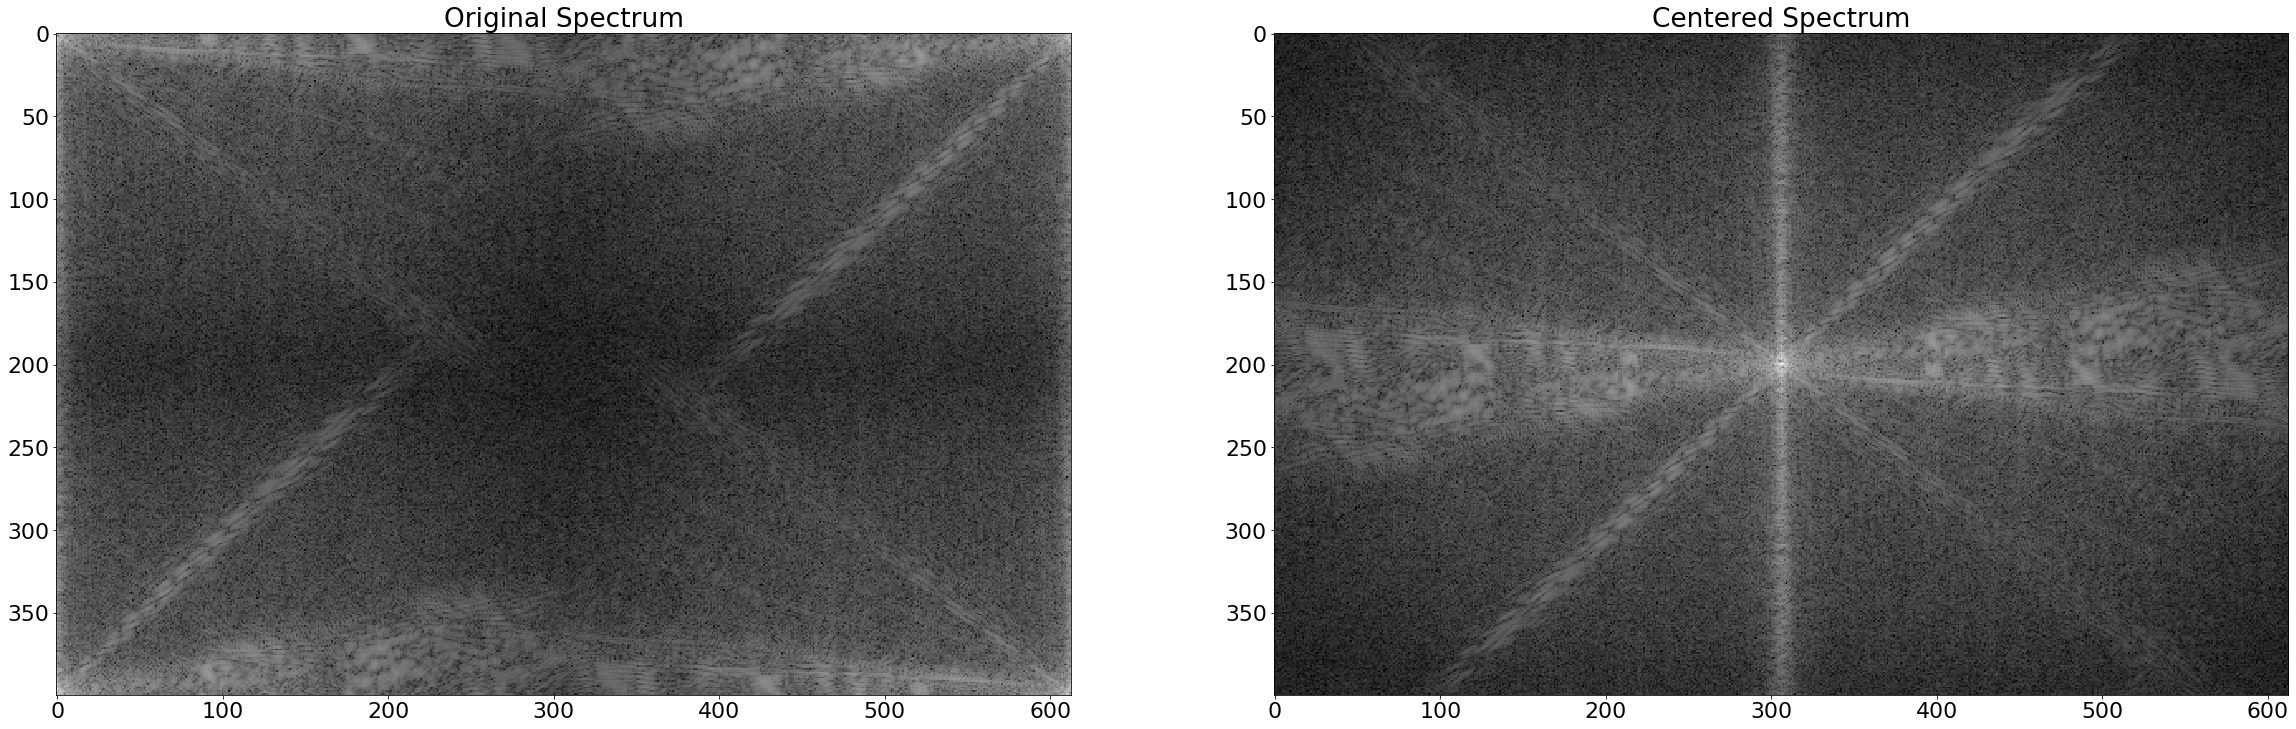

In [10]:
plt.figure(figsize=(40, 30))

ft_centered = center_frequencies(ft_original)

plt.subplot(121)
show_spectrum(ft_original)
plt.title("Original Spectrum")

plt.subplot(122)
show_spectrum(ft_centered)
plt.title("Centered Spectrum")

plt.show()

#### Analysis:

***Centered Spectrum***: Looking at this image we have to mind that whatever we see here is "perpendicular" to the real image. As we observe the center horizontal has a bigger presense which corresponds to all the vertical bars in the image, as well as the the top-right to bottom-left diagonal is a tad brighter than the other diagonal, which corresponds to stairs stretching from top-left to bottom-right.

The centered spectrum is also very convenient to work with when applying filters, but first have to take a look at the inverse Fourier Transform and see if we can actually recompose back to the original image.

In [11]:
def idft2(ft_image, idft = np.fft.ifft):
    """
    Reusing the dft2 steps as the order of applying on the rows and columns those not matter if done one after another.
    Extract real terms out of DFT complex result.
    """
    complex_image = dft2(ft_image, idft)

    get_real = np.vectorize(lambda x: x.real)
    image = get_real(complex_image)

    return image

assert np.allclose(idft2(ft_original), np.fft.ifft2(ft_original)), 'Incorrect Inverse DFT implementation'

def decenter_frequencies(ft_centered):
    return np.fft.ifftshift(ft_centered)

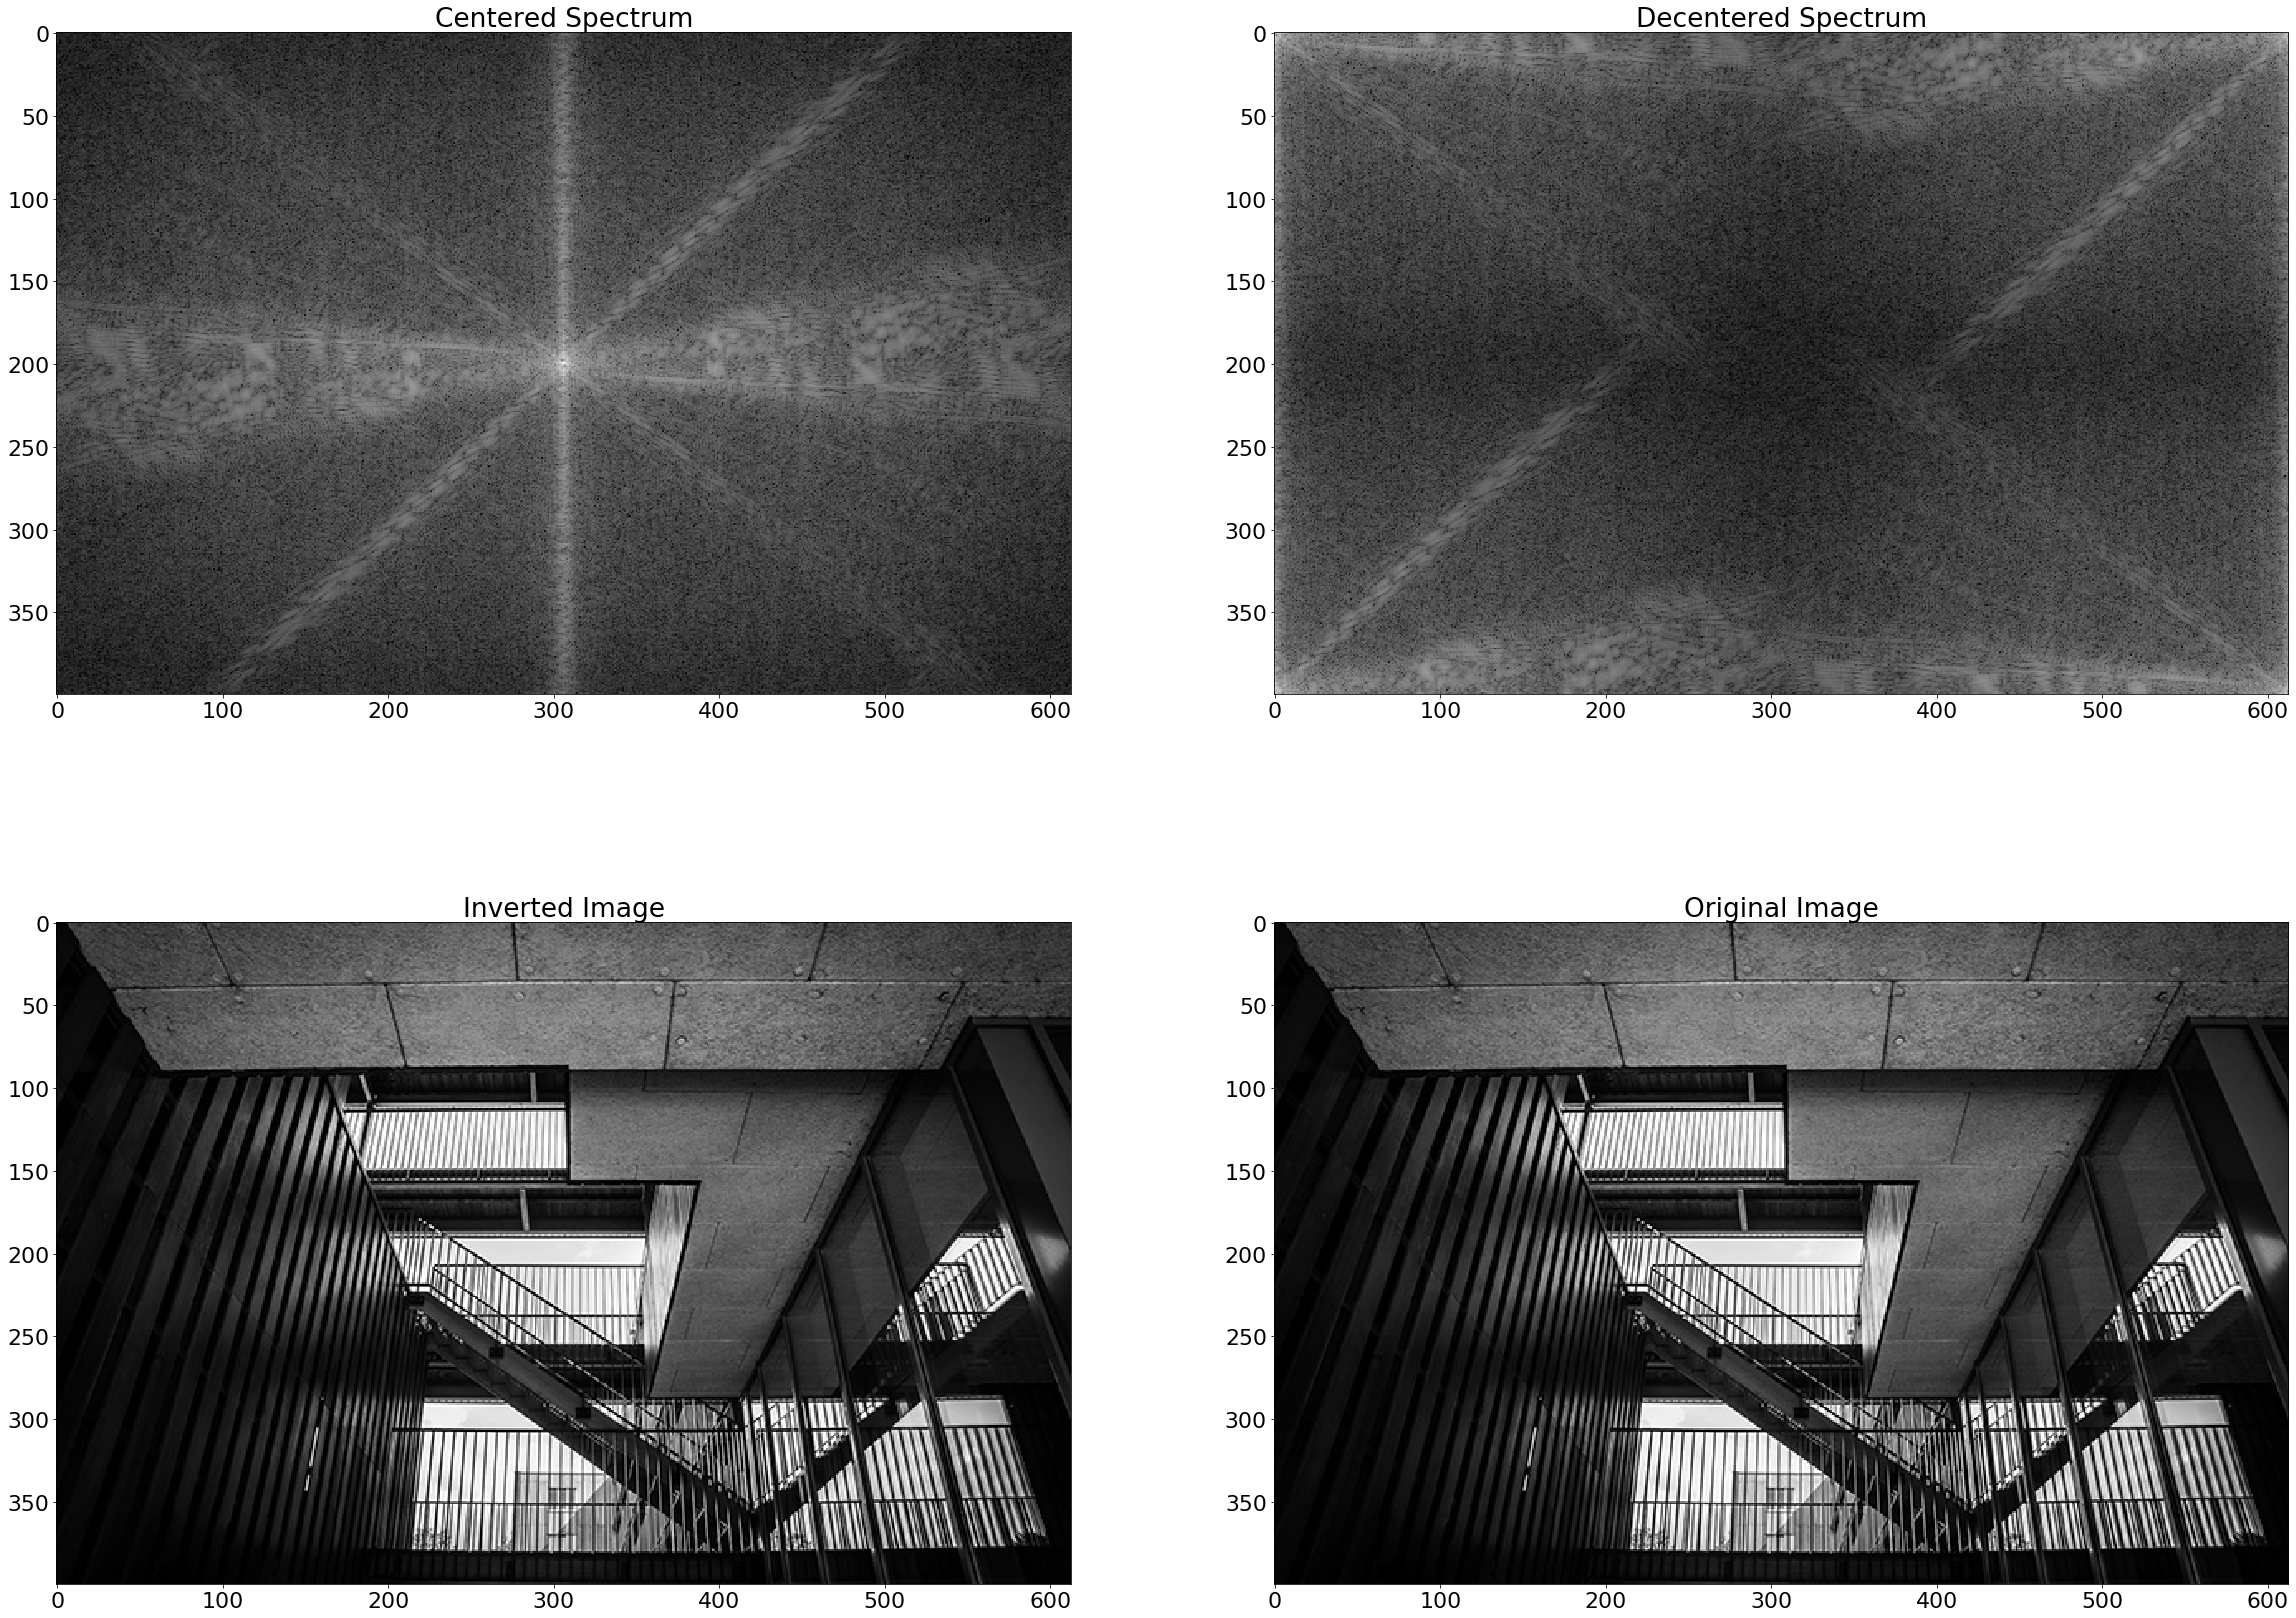

In [12]:
plt.figure(figsize=(40, 30))

ft_decentered = decenter_frequencies(ft_centered)
assert np.allclose(ft_decentered, ft_original), 'Incorect decentered image'

plt.subplot(221)
show_spectrum(ft_centered)
plt.title("Centered Spectrum")

plt.subplot(222)
show_spectrum(ft_decentered)
plt.title("Decentered Spectrum")

inverted_image = idft2(ft_decentered)
assert np.allclose(inverted_image, image), 'Incorect inversed image'

plt.subplot(223)
show_image(inverted_image)
plt.title("Inverted Image")

plt.subplot(224)
show_image(image)
plt.title("Original Image")

plt.show()

We can now combine everything into a single function:

In [13]:
def process_image(image, ft_filter = None, show = False, filter_name = None):
    """
    Process image by applying a filter onto the frequency spectrum. 
    """
    ft_original = dft2(image)
    ft_centered = center_frequencies(ft_original)

    ft_processed = ft_centered

    ft_filtered = None
    if ft_filter != None:
        ft_processed = ft_processed * ft_filter(image) # filtering by negating pixel strength

    ft_decentered = decenter_frequencies(ft_processed)
    processed_image = idft2(ft_decentered)

    if show:
        plt.figure(figsize=(40, 30))

        plt.subplot(321)
        show_image(image)
        plt.title("Original Image")

        plt.subplot(322)
        show_spectrum(ft_centered)
        plt.title("Spectrum")

        if ft_filter != None:
            filter_title = filter_name if filter_name != None else "Filter"
            centered_filter_title = filter_title + " on Centered Spectrum"
            
            blank_spectrum = np.full(image.shape[:2], 1)
            spectrum_filter = blank_spectrum * ft_filter(blank_spectrum)
    
            plt.subplot(323)
            plt.title(filter_title)
            show_spectrum(spectrum_filter)
            
            plt.subplot(324)
            plt.title(centered_filter_title)
            show_spectrum(ft_processed)

        plt.subplot(325)
        show_image(processed_image)
        plt.title("Processed Image")
        
        plt.show()
    
    return processed_image

assert np.allclose(image, process_image(image)), 'Image is not reverted correctly.'

### Fourier Transform Application

We have previously used the result of Forward Fourier Transform for analysis. Now we can look at different type of filtering, namely:
* Low-pass filtering
* High-pass filtering

In [14]:
def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

#### Low-pass Filtering

Low-pass Filter is a filter that only allows low frequencies to pass through. In terms of image that means there no neighbouring pixels with big different, that applies to both color and shape; kind of the opposite of sharpening - removing sudden changes.

The filter itself is applied to the centered spectrum of the image, and since it allows only low frequencies to reside, that mean the spectrum should only allow pixels in the center.

In [15]:
def filter_low_pass(radius, image):
    image_shape = image.shape
    filtered_spectrum = np.zeros(image_shape[:2])
    rows, cols = image_shape[:2]
    center = (rows / 2, cols / 2)

    for x in range(cols):
        for y in range(rows):
            if distance((y,x), center) < radius:
                filtered_spectrum[y,x] = 1 # blackens pixels outside the center

    return filtered_spectrum

def low_pass_filter(radius):
    return lambda image: filter_low_pass(radius, image)

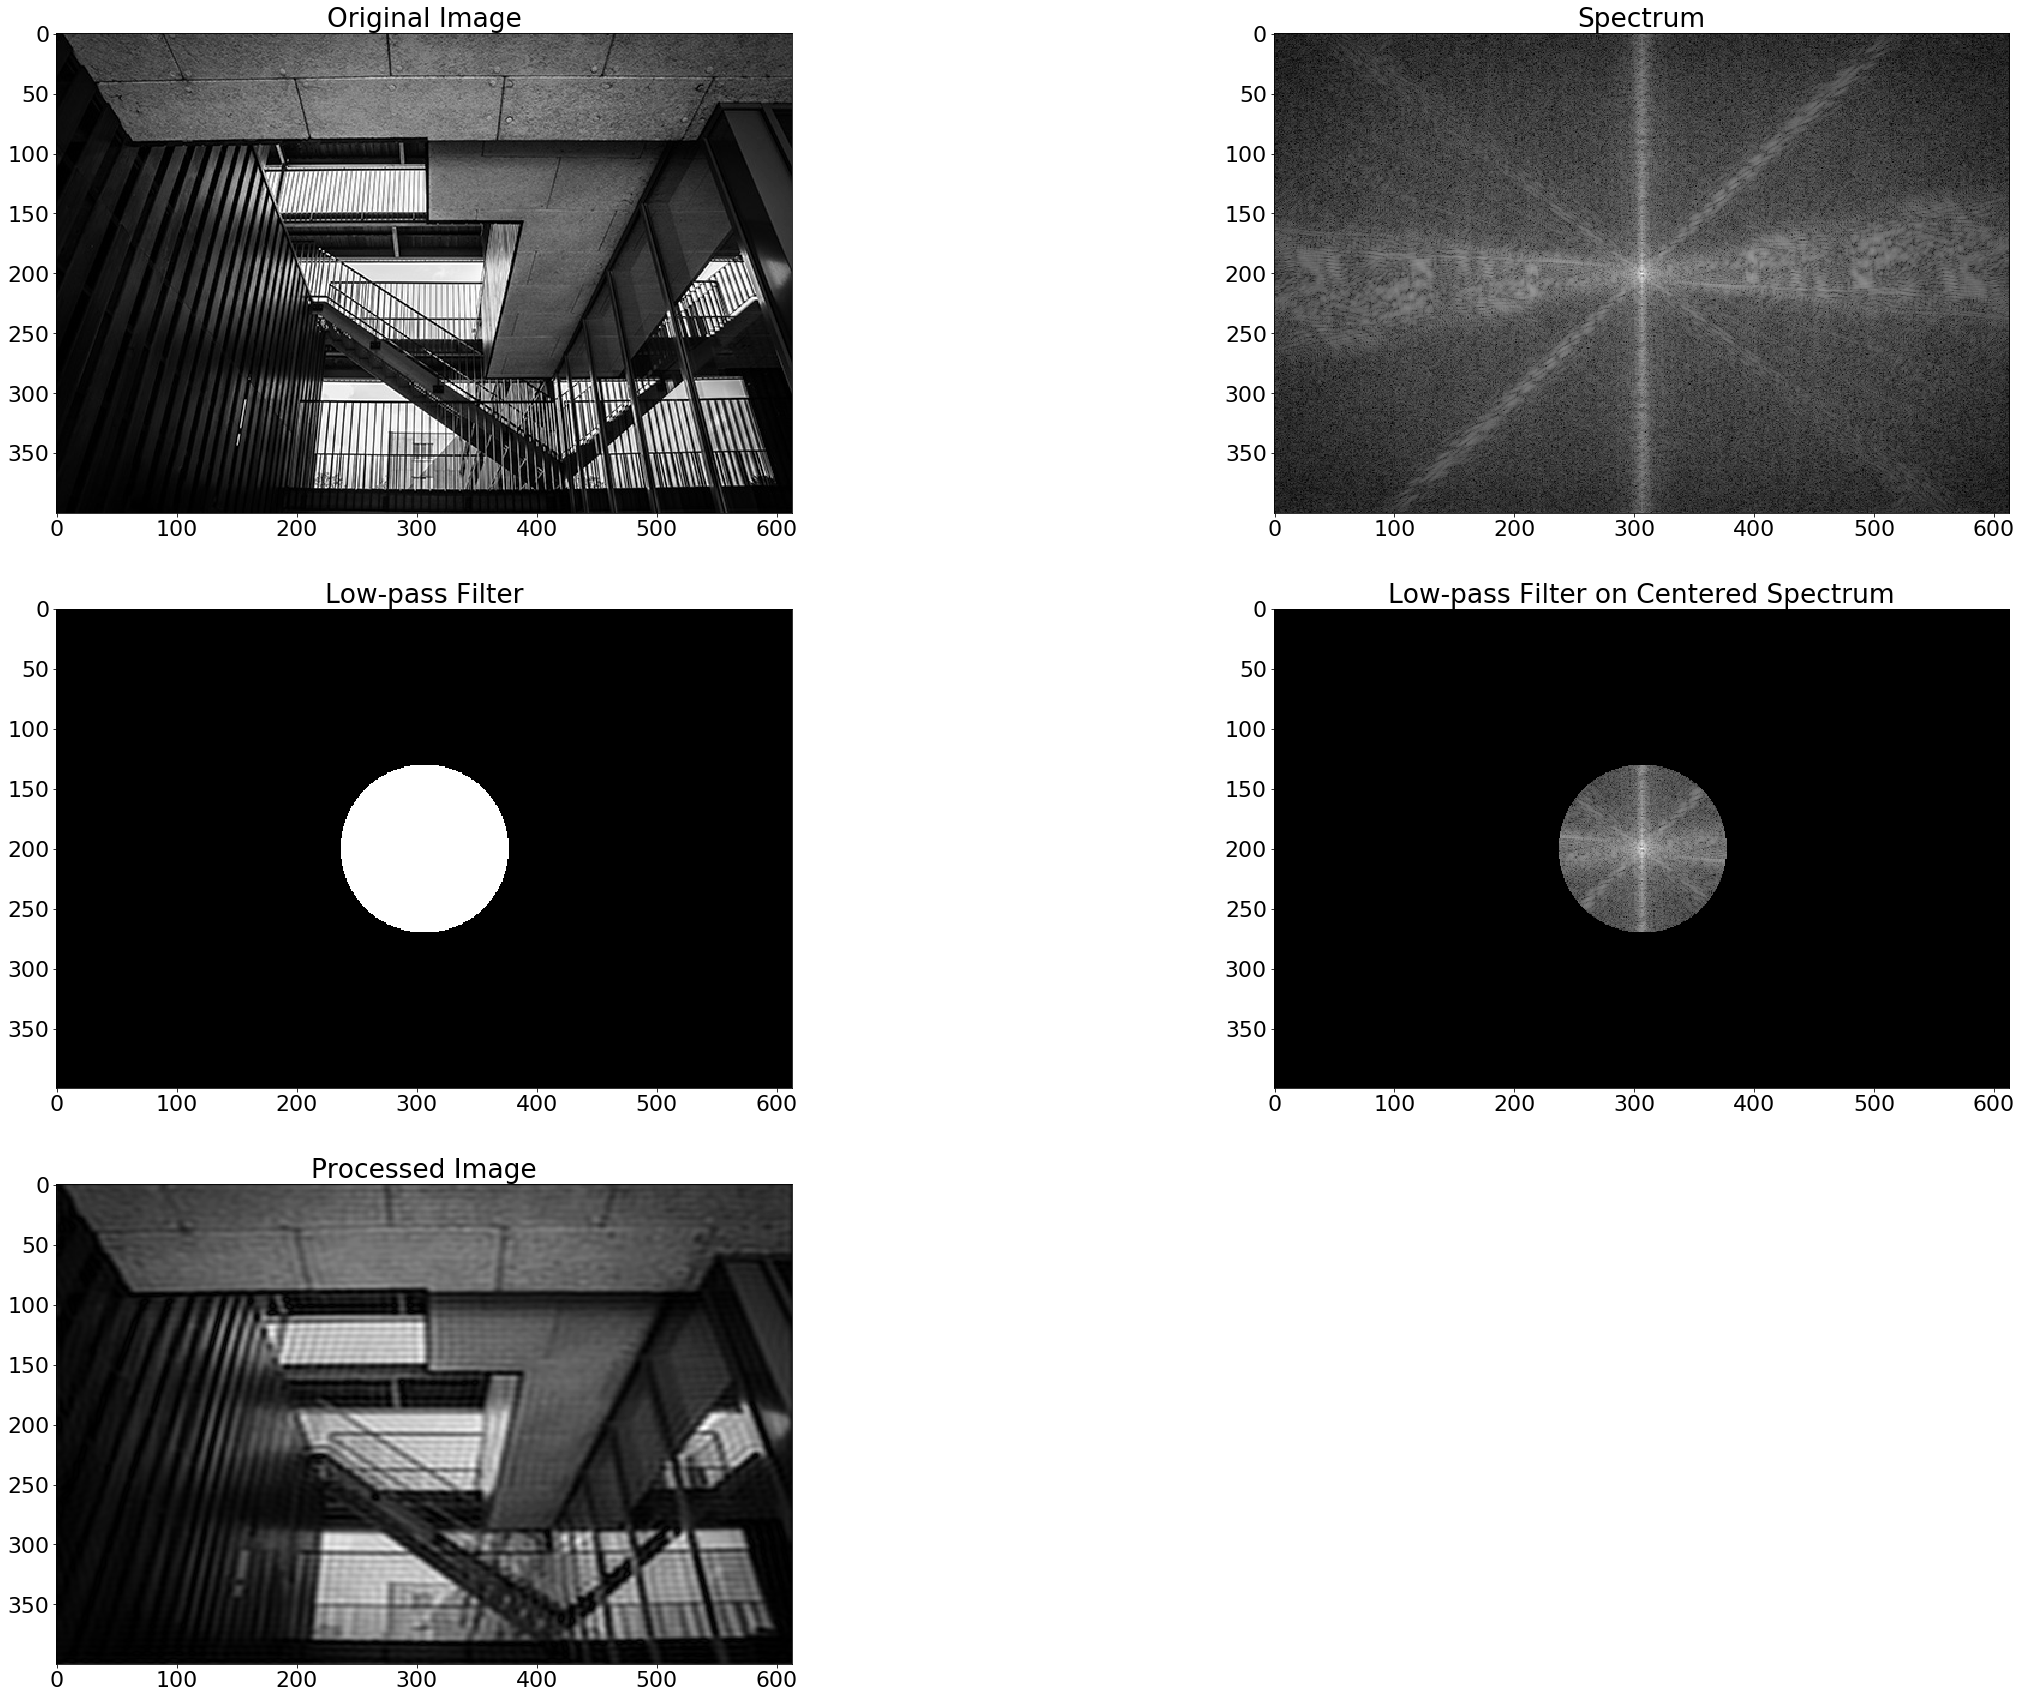

In [16]:
processed_image = process_image(image, ft_filter = low_pass_filter(70), filter_name = 'Low-pass Filter', show = True)

#### High-pass Filtering

High-pass Filter is a filter that only allows high frequencies to pass through. So these are the frequencies that describes the sudden changes in the image - these are the edges. By enhancing these frequencies we can get sharper image.

The filter itself is the opposite of Low-pass Filter. Black circle in the center.

In [17]:
def filter_high_pass(radius, image):
    image_shape = image.shape
    filtered_spectrum = np.full(image_shape[:2], 1)
    rows, cols = image_shape[:2]
    center = (rows / 2, cols / 2)

    for x in range(cols):
        for y in range(rows):
            if distance((y,x), center) < radius:
                filtered_spectrum[y,x] = 0 # blackens pixels outside the center

    return filtered_spectrum

def high_pass_filter(radius):
    return lambda image: filter_high_pass(radius, image)

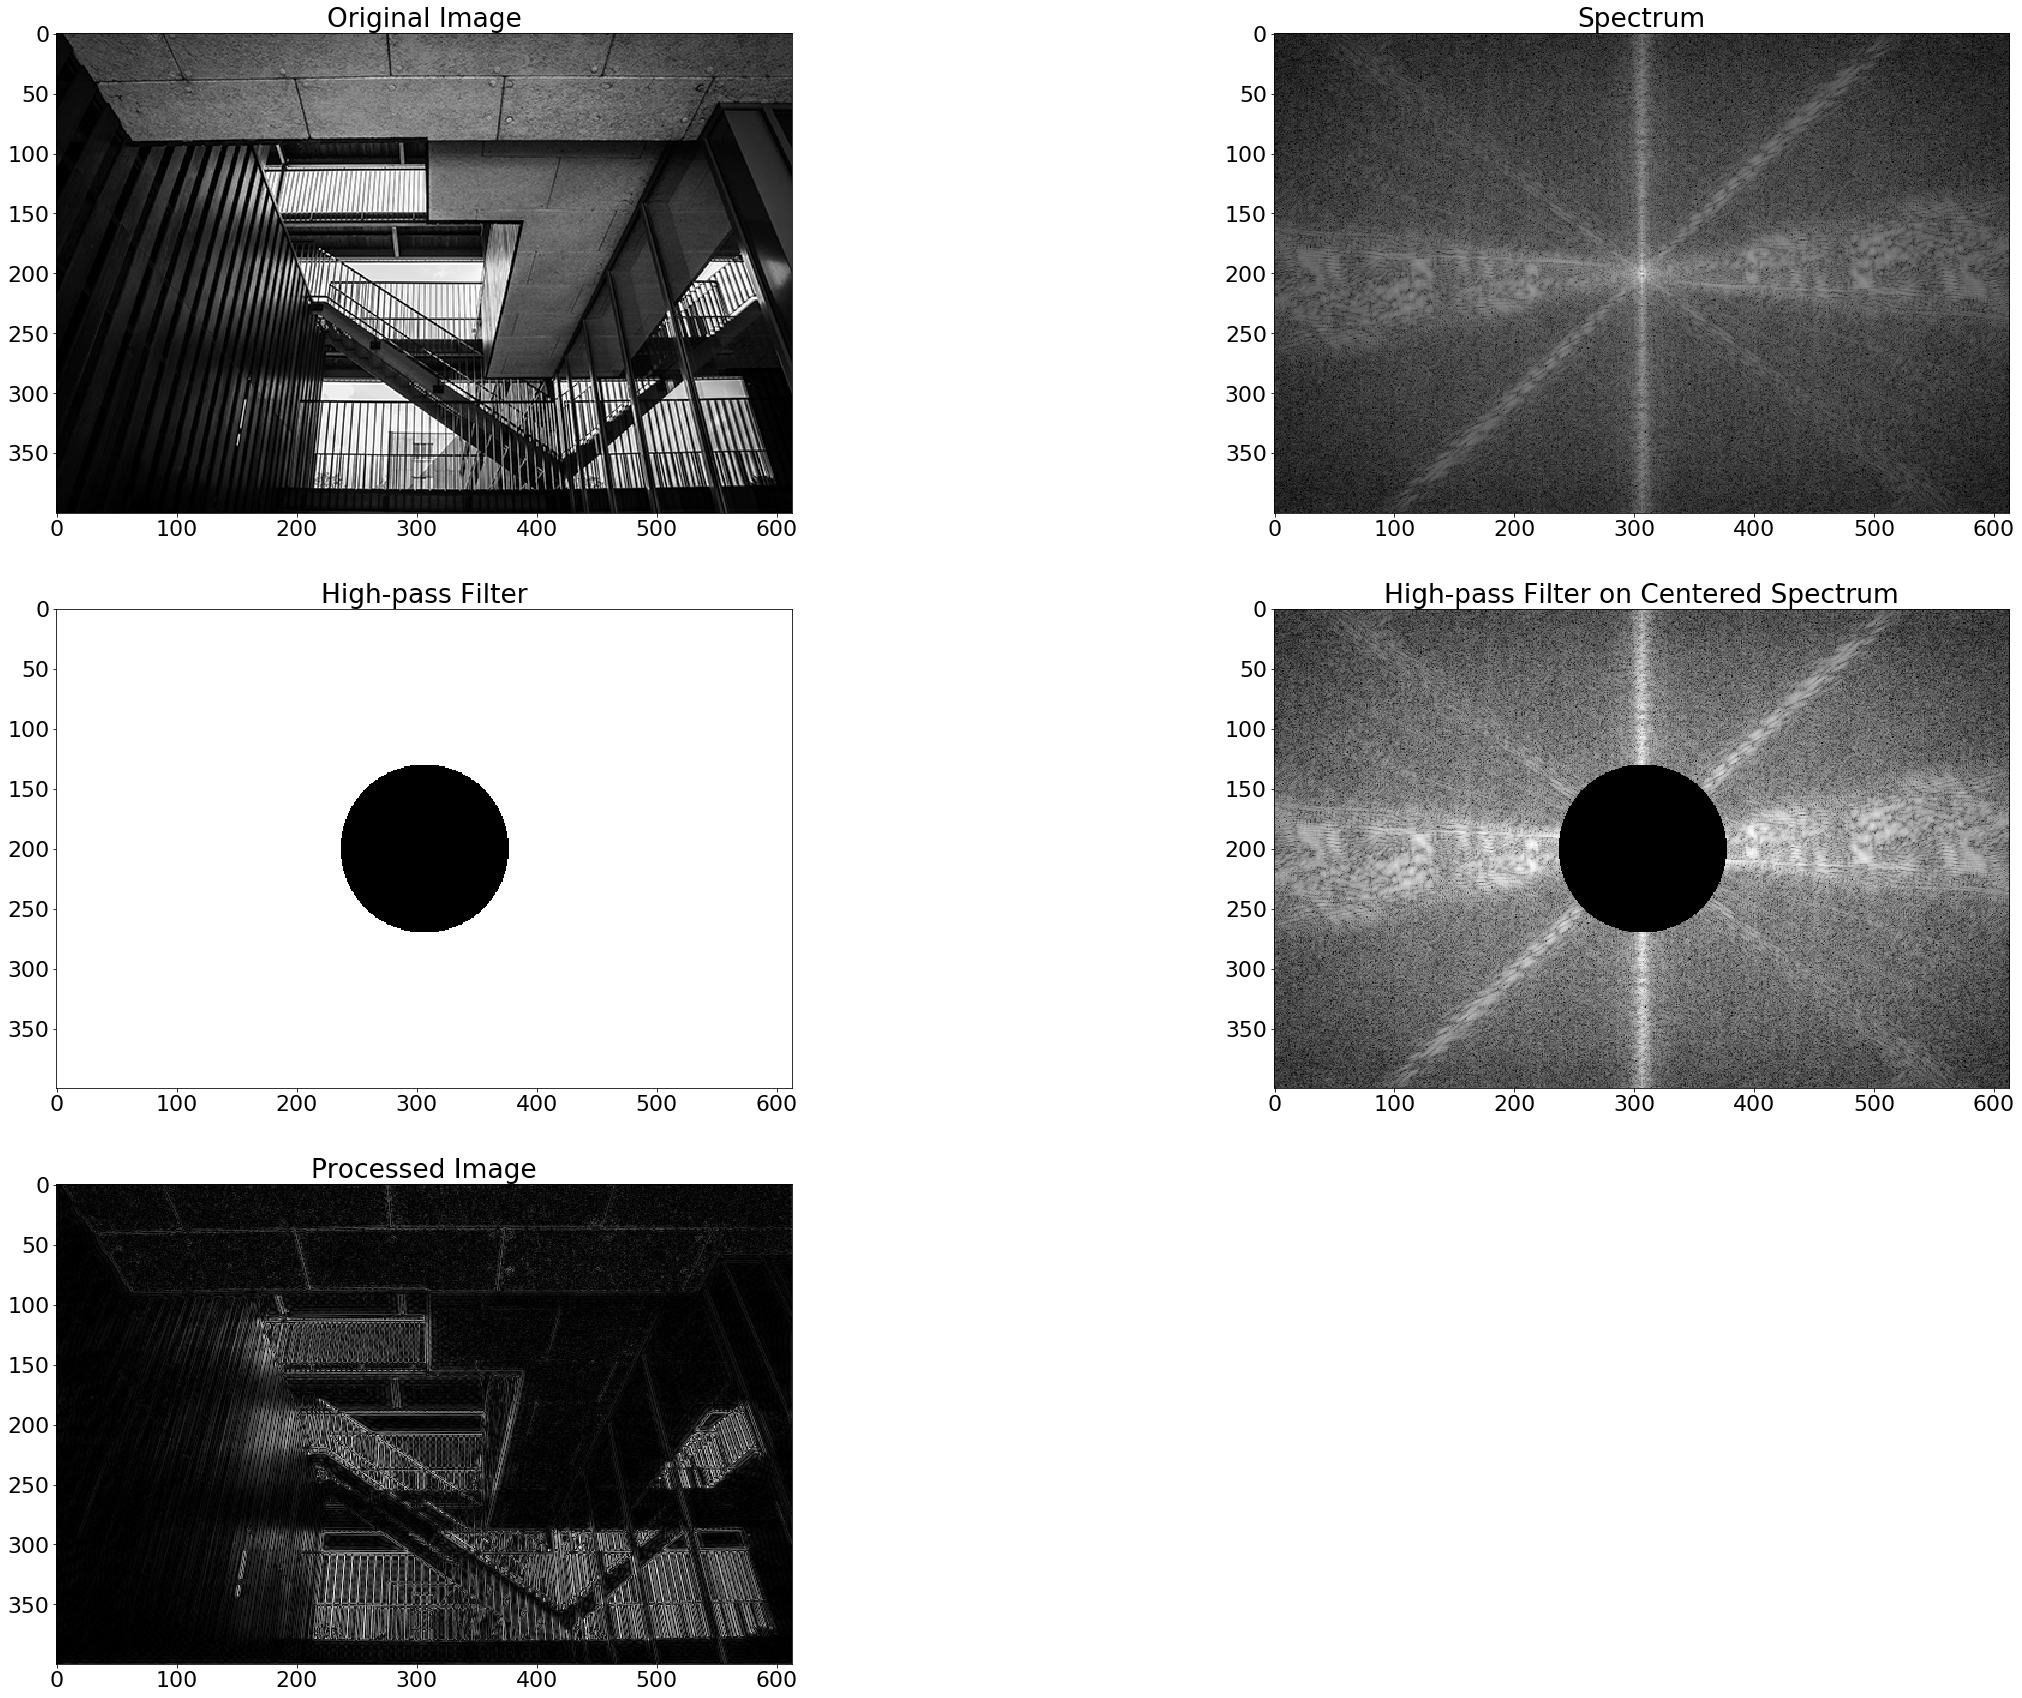

In [18]:
processed_image = process_image(image, ft_filter = high_pass_filter(70), filter_name = 'High-pass Filter', show = True)

These two filters are called ideal filters as the transitioning between existing and removed frequncienies is sudden. The result of which (as seen in the Low-pass filter) is artefacting and pixeled images. There are filters that smooths out these transitions such as the Butterworth Filteror the Gaussian Filter.

### References:

1. Digital Image Processing using Fourier Transform in Python, by Craig Chen
 - https://medium.com/@hicraigchen/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82
2. Discrete Fourier Transform - Simple Step by Step, by Simon Xu - https://www.youtube.com/watch?v=mkGsMWi_j4Q
3. Introduction to the Fourier Transform, by Brian Douglas - https://www.youtube.com/watch?v=1JnayXHhjlg
4. 2D Fourier transforms and applications, by A. Zisserman - http://www.robots.ox.ac.uk/~az/lectures/ia/lect2.pdf
5. Fourier Transform, by Wikipedia - https://en.wikipedia.org/wiki/Fourier_transform

### Self-assessment:
The numbers in brackets define possible points for the corresponding item.
Replace the numbers in brackets with your own estimation.
** Example: **
1. Problem statement: 7
2. Problem description: 3
(end of example)

1. Problem statement (10)
	* How well is the problem defined?
	* Does the research address a real-life problem?
	* Does the research solve the correct problem?
2. Layout (20)
	* Are the document sections structured properly?
	* Is the article well-formatted (in terms of readability)?
3. Code quality (17)
	* Is the code well-written? Is the code self-documenting?
	* Is the code organized into functions?
	* Is the code generally well-structured?
4. Previous research (10)
	* Have you cited at least two other sources?
	* Does the project contain comparisons between the current and the previous results?
5. Gathering / generating, cleaning, and formatting data (8)
	* Every problem deals with "real-world" data in some way. Even if you don't use datasets, you'll likely generate some data
	* How is the data gathered?
	* Is the process statistically valid?
	* Is the process of data acquisition, data cleaning, and data manipulation well documented?
6. Testing (7)
	* This can have various meanings: unit testing, hypothesis testing, train / test data set, etc.
	* Is the code thoroughly tested?
	* Are there any comparisons to other implementations / other articles / previous research?
7. Visualization (9)
	* All kinds of projects employ some visualization: graphical plots, tables, etc.
	* Are all visualizations correct (i.e. convey the intended meaning without misleading the intended audience)?
	* Are all visualizations clear, and easy to understand?
8. Communication (8)
	* Does the project tell the story correctly?
	* Does the project serve the audience it was intended for?